In [0]:
# importing modules
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [0]:
# Importing data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample.csv')
description = pd.read_csv('Data_Description.csv')
description

,Variable,Description
0,pc,Primary Camera mega pixels
1,fc,Front Camera mega pixels
2,sc_h,Screen Height of mobile in cm
3,sc_w,Screen Width of mobile in cm
4,m_dep,Mobile Depth in cm
5,px_width,Pixel Resolution Width
6,px_height,Pixel Resolution Height
7,ram,Random Access Memory in Mega Bytes
8,int_memory,Internal Memory in Giga Bytes
9,four_g,Has 4G or not


In [0]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


In [0]:
d = train.describe(percentiles=[0.6,.7,.75,0.8,.85,.90,.95]).T.copy()
d['median'] = train.median()
d

,count,mean,std,min,50%,60%,70%,75%,80%,85%,90%,95%,max,median
battery_power,2000.0,1238.51850,439.418206,501.0,1226.0,1395.4,1549.0,1615.25,1698.2,1775.15,1851.0,1930.15,1998.0,1226.0
blue,2000.0,0.49500,0.500100,0.0,0.0,1.0,1.0,1.00,1.0,1.00,1.0,1.00,1.0,0.0
clock_speed,2000.0,1.52225,0.816004,0.5,1.5,1.8,2.1,2.20,2.4,2.50,2.7,2.80,3.0,1.5
dual_sim,2000.0,0.50950,0.500035,0.0,1.0,1.0,1.0,1.00,1.0,1.00,1.0,1.00,1.0,1.0
fc,2000.0,4.30950,4.341444,0.0,3.0,4.0,6.0,7.00,8.0,9.00,11.0,13.00,19.0,3.0
four_g,2000.0,0.52150,0.499662,0.0,1.0,1.0,1.0,1.00,1.0,1.00,1.0,1.00,1.0,1.0
int_memory,2000.0,32.04650,18.145715,2.0,32.0,38.0,44.0,48.00,51.0,54.00,57.0,61.00,64.0,32.0
m_dep,2000.0,0.50175,0.288416,0.1,0.5,0.6,0.7,0.80,0.8,0.90,0.9,1.00,1.0,0.5
mobile_wt,2000.0,140.24900,35.399655,80.0,141.0,153.0,164.0,170.00,178.0,184.00,189.0,196.00,200.0,141.0
n_cores,2000.0,4.52050,2.287837,1.0,4.0,5.0,6.0,7.00,7.0,7.00,8.0,8.00,8.0,4.0


In [0]:
# Let's check the unique values
train.nunique()

In [0]:
# corr = train.corr().copy()
plt.figure(figsize=[20,18])
sns.heatmap(corr,fmt='.2g',cmap="YlGnBu",annot=True)

In [0]:
# Let's check the discrete values of a dataframe
for columns in train.columns:
  print('Distinct values of "{0}" is {1}: '.format(columns,train[columns].unique()))

In [0]:
# Let's scale the remaining variables
cols =  train.drop('price_range',axis=1).columns

# Let's scale the variables
scale = StandardScaler()
train[cols] = scale.fit_transform(train[cols])
test[cols] = scale.transform(test[cols])

train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2000.000000
mean,2.128298e-16,-1.927347e-16,-2.172151e-16,3.990142e-16,9.230117e-17,-2.048361e-16,-8.754109e-17,-1.045830e-16,1.804112e-16,-4.690692e-17,1.669775e-16,1.287304e-16,5.595524e-17,-1.582068e-16,3.719247e-17,-4.085621e-17,1.052491e-16,2.184919e-16,3.065326e-16,4.278800e-16,1.500000
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.118314
min,-1.678817e+00,-9.900495e-01,-1.253064e+00,-1.019184e+00,-9.928904e-01,-1.043966e+00,-1.656260e+00,-1.393304e+00,-1.702391e+00,-1.539175e+00,-1.635631e+00,-1.454027e+00,-1.739251e+00,-1.722711e+00,-1.734608e+00,-1.324131e+00,-1.649584e+00,-1.786861e+00,-1.006018e+00,-1.014099e+00,0.000000
25%,-8.804033e-01,-9.900495e-01,-1.007906e+00,-1.019184e+00,-7.624947e-01,-1.043966e+00,-8.845346e-01,-1.046495e+00,-8.829695e-01,-6.647678e-01,-8.109291e-01,-8.167289e-01,-8.719579e-01,-8.453168e-01,-7.849833e-01,-8.649215e-01,-9.173306e-01,5.596406e-01,-1.006018e+00,-1.014099e+00,0.750000
50%,-2.849593e-02,-9.900495e-01,-2.727384e-02,9.811771e-01,-3.017032e-01,9.578860e-01,-2.563229e-03,-6.069151e-03,2.122020e-02,-2.275644e-01,1.377252e-02,-1.828116e-01,-1.045034e-02,2.055123e-02,-7.276497e-02,-1.761069e-01,-2.013697e-03,5.596406e-01,9.940179e-01,9.860966e-01,1.500000
75%,8.575560e-01,1.010051e+00,8.307794e-01,9.811771e-01,6.198797e-01,9.578860e-01,8.794082e-01,1.034357e+00,8.406421e-01,1.084046e+00,8.384742e-01,6.810064e-01,8.828792e-01,8.670548e-01,8.768595e-01,7.423125e-01,9.133032e-01,5.596406e-01,9.940179e-01,9.860966e-01,2.250000
max,1.728812e+00,1.010051e+00,1.811412e+00,9.811771e-01,3.384628e+00,9.578860e-01,1.761380e+00,1.727974e+00,1.688320e+00,1.521249e+00,1.663176e+00,2.963672e+00,1.727608e+00,1.727851e+00,1.589078e+00,2.808756e+00,1.645557e+00,5.596406e-01,9.940179e-01,9.860966e-01,3.000000


In [0]:
X = train.drop('price_range',axis=1)
y = train['price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [0]:
X_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
836,-0.766019,1.010051,-1.130485,0.981177,-0.992890,-1.043966,1.706256,0.687548,-0.515642,0.209639,0.673534,-0.633597,0.251068,1.410643,1.351672,0.512708,0.730240,-1.786861,0.994018,0.986097
575,-0.094509,1.010051,-1.253064,0.981177,1.080671,-1.043966,-0.664042,-1.393304,-0.317851,0.209639,0.013773,-0.971686,1.061082,0.701535,1.589078,0.283103,0.547176,0.559641,0.994018,0.986097
557,0.638462,-0.990050,0.708200,-1.019184,-0.992890,-1.043966,-0.002563,0.687548,1.688320,-1.539175,0.013773,-1.075367,-0.028965,0.726432,-0.310171,0.971917,0.730240,0.559641,0.994018,-1.014099
1235,1.667352,1.010051,-1.253064,0.981177,-0.992890,-1.043966,0.438422,-0.699686,1.292737,1.084046,1.498235,-0.360872,-0.762606,-1.432244,-1.022389,0.283103,1.096367,0.559641,0.994018,-1.014099
1360,-0.811545,-0.990050,-1.007906,0.981177,1.080671,0.957886,-0.223056,-1.046495,0.303779,0.646842,1.003414,-0.895053,-0.850550,-1.266263,1.589078,1.201522,-0.551204,0.559641,-1.006018,0.986097


### GridsearchCV using DecisionTreeClassifier

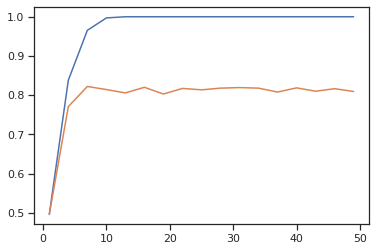

In [0]:
parameters = {'max_depth':range(1,50,3)}
dt = DecisionTreeClassifier(criterion='gini')
model = GridSearchCV(dt,param_grid=parameters,scoring='accuracy',cv=5,return_train_score=True)
model.fit(X_train,y_train)
cv = pd.DataFrame(model.cv_results_)
cv.head(2)

plt.figure(figsize=[6,4])
plt.plot(cv['param_max_depth'],cv['mean_train_score'])
plt.plot(cv['param_max_depth'],cv['mean_test_score'])
plt.show()

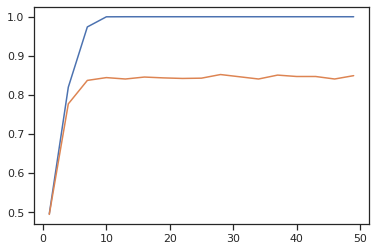

In [0]:
parameters = {'max_depth':range(1,50,3)}
dt = DecisionTreeClassifier(criterion='entropy')
model = GridSearchCV(dt,param_grid=parameters,scoring='accuracy',cv=5,return_train_score=True)
model.fit(X_train,y_train)
cv = pd.DataFrame(model.cv_results_)
cv.head(2)

plt.figure(figsize=[6,4])
plt.plot(cv['param_max_depth'],cv['mean_train_score'])
plt.plot(cv['param_max_depth'],cv['mean_test_score'])
plt.show()

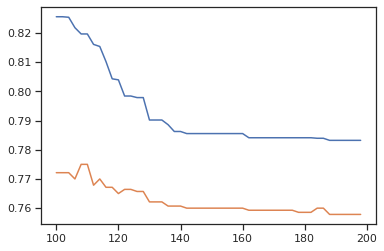

In [0]:
parameters = {'min_samples_split':range(100,200,2)}
dt = DecisionTreeClassifier(criterion='gini')
model = GridSearchCV(dt,param_grid=parameters,scoring='accuracy',cv=5,return_train_score=True)
model.fit(X_train,y_train)
cv = pd.DataFrame(model.cv_results_)
cv.head(2)

# param_min_samples_split
plt.figure(figsize=[6,4])
plt.plot(cv['param_min_samples_split'],cv['mean_train_score'])
plt.plot(cv['param_min_samples_split'],cv['mean_test_score'])
plt.show()

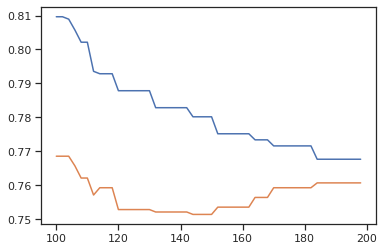

In [0]:
parameters = {'min_samples_split':range(100,200,2)}
dt = DecisionTreeClassifier(criterion='entropy')
model = GridSearchCV(dt,param_grid=parameters,scoring='accuracy',cv=5,return_train_score=True)
model.fit(X_train,y_train)
cv = pd.DataFrame(model.cv_results_)
cv.head(2)

# param_min_samples_split
plt.figure(figsize=[6,4])
plt.plot(cv['param_min_samples_split'],cv['mean_train_score'])
plt.plot(cv['param_min_samples_split'],cv['mean_test_score'])
plt.show()

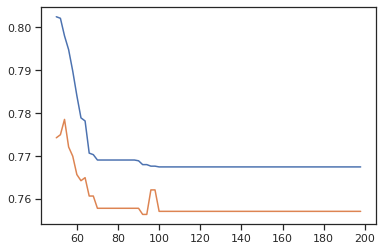

In [0]:
parameters = {'min_samples_leaf':range(50,200,2)}
dt = DecisionTreeClassifier(criterion='gini')
model = GridSearchCV(dt,param_grid=parameters,scoring='accuracy',cv=5,return_train_score=True)
model.fit(X_train,y_train)
cv = pd.DataFrame(model.cv_results_)
cv.head(2)

# param_min_samples_leaf
plt.figure(figsize=[6,4])
plt.plot(cv['param_min_samples_leaf'],cv['mean_train_score'])
plt.plot(cv['param_min_samples_leaf'],cv['mean_test_score'])
plt.show()

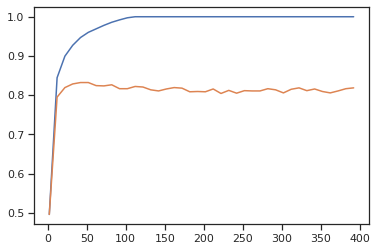

In [0]:
parameters = {'max_leaf_nodes':range(2,400,10)}
dt = DecisionTreeClassifier(criterion='gini')
model = GridSearchCV(dt,param_grid=parameters,scoring='accuracy',cv=5,return_train_score=True)
model.fit(X_train,y_train)
cv = pd.DataFrame(model.cv_results_)
cv.head(2)

# param_max_leaf_nodes
plt.figure(figsize=[6,4])
plt.plot(cv['param_max_leaf_nodes'],cv['mean_train_score'])
plt.plot(cv['param_max_leaf_nodes'],cv['mean_test_score'])
plt.show()

In [0]:
#########################################################
# Gini
parameters = {'criterion':['gini'],'min_samples_split':[190],'max_depth':[7],'min_samples_leaf':[110],'max_leaf_nodes':[35]}
g_dt = DecisionTreeClassifier()
GcV1 = GridSearchCV(g_dt,param_grid=parameters,scoring='accuracy')
model1 = GcV1.fit(X_train,y_train)
# model.score
print("Score is {:.3f}".format(model1.score(X_test,y_test)))
print("Score is {:.3f}".format(model1.score(X_train,y_train)))

#########################################################
# Entropy
parameters = {'criterion':['entropy'],'min_samples_split':[190],'max_depth':[7],'min_samples_leaf':[110],'max_leaf_nodes':[35]}
dt = DecisionTreeClassifier()
GcV = GridSearchCV(dt,param_grid=parameters,scoring='accuracy')
model = GcV.fit(X_train,y_train)
# model.score
print("Score is {:.3f}".format(model.score(X_test,y_test)))
print("Score is {:.3f}".format(model.score(X_train,y_train)))

Score is 0.750
Score is 0.768
Score is 0.750
Score is 0.768


### GridsearchCV using SVM

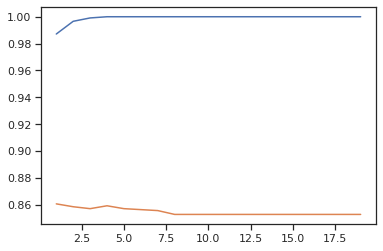

In [0]:
svm = SVC()
parameters = {'C':range(1,20,1)}
GcV = GridSearchCV(svm,param_grid=parameters,scoring='accuracy',cv=5,return_train_score=True)
GcV.fit(X_train,y_train)

# Export data
cv = pd.DataFrame(GcV.cv_results_)
cv.head(2)

# param_C
plt.figure(figsize=[6,4])
plt.plot(cv['param_C'],cv['mean_train_score'])
plt.plot(cv['param_C'],cv['mean_test_score'])
plt.show()

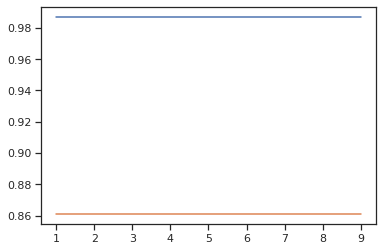

In [0]:
svm = SVC()
parameters = {'degree':range(1,10,1)}
GcV = GridSearchCV(svm,param_grid=parameters,scoring='accuracy',cv=5,return_train_score=True)
GcV.fit(X_train,y_train)

# Export data
cv = pd.DataFrame(GcV.cv_results_)
cv.head()

# param_degree
plt.figure(figsize=[6,4])
plt.plot(cv['param_degree'],cv['mean_train_score'])
plt.plot(cv['param_degree'],cv['mean_test_score'])
plt.show()

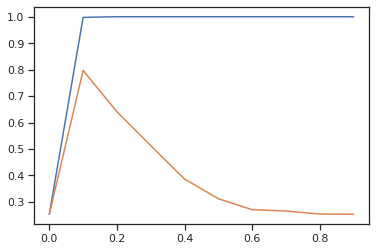

In [0]:
svm = SVC()
parameters = {'gamma':[0.1,0.2,.3,.4,.5,.6,.7,.8,.9]}
GcV = GridSearchCV(svm,param_grid=parameters,scoring='accuracy',cv=5,return_train_score=True)
GcV.fit(X_train,y_train)

# Export data
cv = pd.DataFrame(GcV.cv_results_)
cv.head()

# param_gamma
plt.figure(figsize=[6,4])
plt.plot(cv['param_gamma'],cv['mean_train_score'])
plt.plot(cv['param_gamma'],cv['mean_test_score'])
plt.show()

In [0]:
# Kernels:rbf
svc = SVC(C=1,kernel='rbf',degree=1,gamma=0.1)
model = svc.fit(X_train,y_train)

print("Score for rbf is {:.3f}".format(model.score(X_test,y_test)))
print("Score for rbf is {:.3f}".format(model.score(X_train,y_train)))

# Kernels:poly
svc = SVC(C=1,kernel='poly',degree=1,gamma=0.1)
model = svc.fit(X_train,y_train)

print("Score for poly is {:.3f}".format(model.score(X_test,y_test)))
print("Score for poly is {:.3f}".format(model.score(X_train,y_train)))

# Kernels:linear
svc = SVC(C=1,kernel='linear',degree=1,gamma=0.1)
model = svc.fit(X_train,y_train)

print("Score for Linear is {:.3f}".format(model.score(X_test,y_test)))
print("Score for Linear is {:.3f}".format(model.score(X_train,y_train)))

# Kernels:sigmoid
svc = SVC(C=1,kernel='sigmoid',degree=1,gamma=0.1)
model = svc.fit(X_train,y_train)

print("Score for sigmoid is {:.3f}".format(model.score(X_test,y_test)))
print("Score for sigmoid is {:.3f}".format(model.score(X_train,y_train)))

Score for rbf is 0.805
Score for rbf is 0.998
Score for poly is 0.937
Score for poly is 0.958
Score for Linear is 0.953
Score for Linear is 0.977
Score for sigmoid is 0.860
Score for sigmoid is 0.623


### Decision Tree using RandomForest


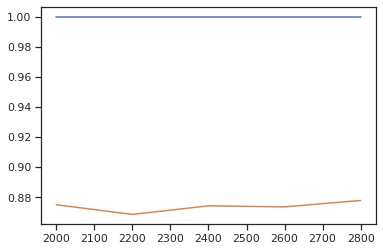

In [0]:
RF = RandomForestClassifier()
parameters = {'n_estimators':range(2000,3000,200)}
GcV = GridSearchCV(RF,param_grid=parameters,scoring='accuracy',cv=5,return_train_score=True)
GcV.fit(X_train,y_train)

# Export data
cv = pd.DataFrame(GcV.cv_results_)
# cv.head()

# param_n_estimators
plt.figure(figsize=[6,4])
plt.plot(cv['param_n_estimators'],cv['mean_train_score'])
plt.plot(cv['param_n_estimators'],cv['mean_test_score'])
plt.show()

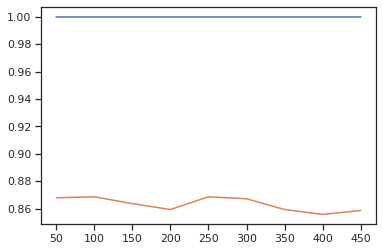

In [0]:
RF = RandomForestClassifier()
parameters = {'max_depth':range(50,500,50)}
GcV = GridSearchCV(RF,param_grid=parameters,scoring='accuracy',cv=5,return_train_score=True)
GcV.fit(X_train,y_train)

# Export data
cv = pd.DataFrame(GcV.cv_results_)
# cv.head()

# param_max_depth
plt.figure(figsize=[6,4])
plt.plot(cv['param_max_depth'],cv['mean_train_score'])
plt.plot(cv['param_max_depth'],cv['mean_test_score'])
plt.show()

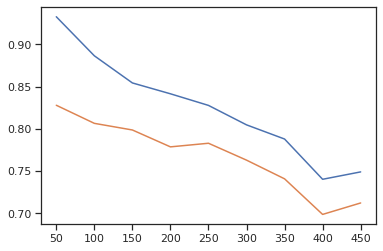

In [0]:
RF = RandomForestClassifier()
parameters = {'min_samples_split':range(50,500,50)}
GcV = GridSearchCV(RF,param_grid=parameters,scoring='accuracy',cv=5,return_train_score=True)
GcV.fit(X_train,y_train)

# Export data
cv = pd.DataFrame(GcV.cv_results_)
# cv.head()

# param_min_samples_split
plt.figure(figsize=[6,4])
plt.plot(cv['param_min_samples_split'],cv['mean_train_score'])
plt.plot(cv['param_min_samples_split'],cv['mean_test_score'])
plt.show()

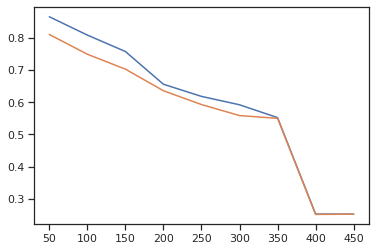

In [0]:
RF = RandomForestClassifier()
parameters = {'min_samples_leaf':range(50,500,50)}
GcV = GridSearchCV(RF,param_grid=parameters,scoring='accuracy',cv=5,return_train_score=True)
GcV.fit(X_train,y_train)

# Export data
cv = pd.DataFrame(GcV.cv_results_)
# cv.head()

# param_min_samples_leaf
plt.figure(figsize=[6,4])
plt.plot(cv['param_min_samples_leaf'],cv['mean_train_score'])
plt.plot(cv['param_min_samples_leaf'],cv['mean_test_score'])
plt.show()

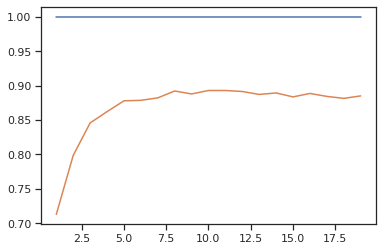

In [0]:
RF = RandomForestClassifier()
parameters = {'max_features':range(1,len(X_train.columns))}
GcV = GridSearchCV(RF,param_grid=parameters,scoring='accuracy',cv=5,return_train_score=True)
GcV.fit(X_train,y_train)

# Export data
cv = pd.DataFrame(GcV.cv_results_)
# cv.head()

# param_max_features
plt.figure(figsize=[6,4])
plt.plot(cv['param_max_features'],cv['mean_train_score'])
plt.plot(cv['param_max_features'],cv['mean_test_score'])
plt.show()

In [0]:
# criterion:gini
RF = RandomForestClassifier(n_estimators = 2800,max_depth = 300,min_samples_split = 150,min_samples_leaf = 100,max_features = 7)
model = RF.fit(X_train,y_train)

print("Score for gini is {:.3f}".format(model.score(X_test,y_test)))
print("Score for gini is {:.3f}".format(model.score(X_train,y_train)))

# criterion:entropy
RF = RandomForestClassifier(n_estimators = 3500,max_depth = 100,min_samples_split = 100,min_samples_leaf = 50,max_features = 5,criterion='entropy')
model = RF.fit(X_train,y_train)

print("Score for entropy is {:.3f}".format(model.score(X_test,y_test)))
print("Score for entropy is {:.3f}".format(model.score(X_train,y_train)))

Score for gini is 0.798
Score for gini is 0.819
Score for entropy is 0.848
Score for entropy is 0.868


### XGB Classifier

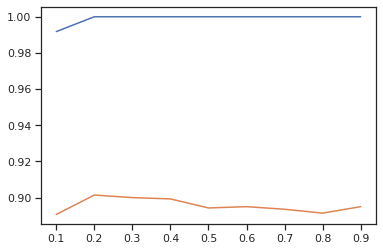

In [0]:
XGB = XGBClassifier()
parameters = {'learning_rate':[.1,.2,.3,.4,.5,.6,.7,.8,.9]}
GcV = GridSearchCV(XGB,param_grid=parameters,scoring='accuracy',cv=5,return_train_score=True)
model = GcV.fit(X_train,y_train)

# Export data
cv = pd.DataFrame(GcV.cv_results_)
cv.head()

# param_learning_rate
plt.figure(figsize=[6,4])
plt.plot(cv['param_learning_rate'],cv['mean_train_score'])
plt.plot(cv['param_learning_rate'],cv['mean_test_score'])
plt.show()

In [0]:
# booster (string) – Specify which booster to use: gbtree, gblinear or dart.
# gbtree
model = XGBClassifier(learning_rate=0.2,n_estimators=1000,max_depth=5,booster='gbtree',gamma=0.1)
model.fit(X_train, y_train)

print("Score for gbtree is {:.3f}".format(model.score(X_test,y_test)))
print("Score for gbtree is {:.3f}".format(model.score(X_train,y_train)))

Score for gbtree is 0.908
Score for gbtree is 1.000
Score for dart is 0.908
Score for dart is 1.000


### Selecting the best Model

In [0]:
svc = SVC(C=1,kernel='linear',degree=1,gamma=0.1)
model = svc.fit(X_train,y_train)

print("Score for Linear is {:.3f}".format(model.score(X_test,y_test)))
print("Score for Linear is {:.3f}".format(model.score(X_train,y_train)))

Score for Linear is 0.953
Score for Linear is 0.977


In [0]:
model

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma=0.1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,-0.445060,1.010051,0.340463,0.981177,2.232650,-1.043966,-1.490890,-1.393304,1.490528,-0.664768,1.003414,-0.944639,0.371413,1.246506,-0.072765,0.283103,-1.649584,-1.786861,0.994018,-1.014099
1,2,-0.904874,1.010051,-1.253064,0.981177,-0.071307,0.957886,1.596010,1.034357,1.434017,0.209639,0.343653,0.227403,-0.913037,1.632873,-1.497202,-1.324131,-0.734267,0.559641,-1.006018,-1.014099
2,3,1.294038,1.010051,1.566254,-1.019184,-0.762495,-1.043966,-0.278179,1.381165,1.292737,-0.664768,-0.975869,1.408462,0.264954,0.250619,1.114266,0.971917,-0.185077,-1.786861,0.994018,0.986097
3,4,0.699922,-0.990050,-1.253064,0.981177,3.154233,0.957886,-0.388426,-0.006069,-1.250297,1.521249,1.663176,-0.789118,1.158284,1.631029,-0.547577,-1.324131,-0.734267,0.559641,0.994018,-1.014099
4,5,0.444976,-0.990050,-0.149853,-1.019184,1.541463,0.957886,0.934531,-0.006069,-0.911225,0.646842,1.333295,0.234165,-1.021810,-0.323860,0.639453,0.512708,-0.734267,0.559641,-1.006018,0.986097


In [0]:
test.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,500.500000,0.022744,0.042002,0.022861,0.015003,0.065317,-0.069064,0.088500,0.054622,-0.020853,-0.084162,0.022679,-0.040541,-0.027174,0.013634,-0.073952,-0.103552,0.013547,-0.012906,-0.006000,1.043610e-17
std,288.819436,0.984407,1.000038,1.016508,1.000102,1.028331,1.001088,0.999312,0.974049,0.984763,1.000389,1.005328,0.975792,1.017542,1.003349,1.025738,0.973539,1.006416,1.008310,1.000518,1.000500e+00
min,1.000000,-1.681094,-0.990050,-1.253064,-1.019184,-0.992890,-1.043966,-1.656260,-1.393304,-1.702391,-1.539175,-1.635631,-1.454027,-1.736937,-1.716257,-1.734608,-1.324131,-1.649584,-1.786861,-1.006018,-1.014099e+00
25%,250.750000,-0.781953,-0.990050,-1.007906,-1.019184,-0.762495,-1.043966,-0.774288,-0.699686,-0.861778,-1.101971,-0.810929,-0.859554,-0.971474,-0.817884,-1.022389,-0.864922,-0.780033,0.559641,-1.006018,-1.014099e+00
50%,500.500000,0.018168,1.010051,-0.027274,0.981177,-0.301703,-1.043966,0.135245,-0.006069,-0.035292,-0.227564,0.013773,-0.181685,-0.003507,0.027006,-0.072765,-0.176107,-0.002014,0.559641,-0.006000,9.860966e-01
75%,750.250000,0.889424,1.010051,0.953358,0.981177,0.619880,0.957886,0.934531,1.034357,0.840642,0.646842,1.003414,0.581270,0.893872,0.867977,0.876859,0.512708,0.913303,0.559641,0.994018,9.860966e-01
max,1000.000000,1.731088,1.010051,1.811412,0.981177,3.384628,0.957886,1.761380,1.727974,1.688320,1.521249,1.663176,2.844214,1.727608,1.719552,1.589078,2.808756,1.645557,0.559641,0.994018,9.860966e-01


In [0]:
submission = pd.DataFrame()
submission['id'] = test['id']
submission.head()

,id
0,1
1,2
2,3
3,4
4,5


In [0]:
predictions = model.predict(test.drop(columns='id',axis=1))
submission['price_range'] = predictions
submission.head()

,id,price_range
0,1,3
1,2,3
2,3,2
3,4,3
4,5,1


In [0]:
submission.to_csv('submission.csv',index=False)

### Model Evaluation

In [0]:
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve

In [0]:
model

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma=0.1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_pred = model.predict(X_train)
confusion = confusion_matrix(y_train,y_pred=y_pred)
confusion

array([[345,   4,   0,   0],
       [  7, 344,   3,   0],
       [  0,   8, 338,   6],
       [  0,   0,   4, 341]])

### logistic Model


In [0]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

mul_lr = LogisticRegression(multi_class='multinomial', solver='newton-cg')
mul_lr.fit(X_train,y_train)

print("Logistic regression Train Accuracy :: {:.3f}".format(accuracy_score(y_train, lr.predict(X_train))))
print("Logistic regression Test Accuracy :: {:.3f}".format(accuracy_score(y_test, lr.predict(X_test))))

print("Multinomial regression Train Accuracy :: {:.3f}".format(accuracy_score(y_train, mul_lr.predict(X_train))))
print("Multinomial regression Test Accuracy :: {:.3f}".format(accuracy_score(y_test, mul_lr.predict(X_test))))

Logistic regression Train Accuracy :: 0.976
Logistic regression Test Accuracy :: 0.958
Multinomial regression Train Accuracy :: 0.976
Multinomial regression Test Accuracy :: 0.958


In [0]:
y_pred = lr.predict(X_train)
confusion = confusion_matrix(y_train,y_pred=y_pred)
confusion

array([[344,   5,   0,   0],
       [  6, 341,   7,   0],
       [  0,   5, 341,   6],
       [  0,   0,   4, 341]])

In [0]:
inputs = [2,3,5,6]
print(np.exp(inputs) / float(sum(np.exp(inputs))))
np.exp(2) / float(sum(np.exp([2,3,5,6])))

[0.01275478 0.03467109 0.25618664 0.69638749]


0.012754781742087938